In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
%matplotlib inline

In [4]:
df = pd.read_csv('14_day_window_10x.csv')
#df = pd.read_csv('../Data/resultados30-04/Oficial/7_day_window.csv')

#df = pd.read_csv('../Data/resultados30-04/Subnotificado/14_day_window_10x.csv')
#df = pd.read_csv('../Data/resultados30-04/Subnotificado/7_day_window.csv')
#df = pd.read_csv('../Data/resultados30-04/Subnotificado/daily_control.csv')

#df = pd.read_csv('../Data/resultados30-04/Oficial/14_day_window_withSaoPauloHelps.csv')
#df = pd.read_csv('../Data/resultados30-04/Subnotificado/14_day_window_12xSaoPauloHelps.csv')

# df = pd.read_csv('../Data/resultados30-04/Oficial/14_day_fullpopulation.csv')

df_rt = df[df['Variable']=='rt']
df_rt = df_rt.drop('Variable',axis=1)

df_i = df[df['Variable']=='i']
df_i = df_i.drop('Variable',axis=1)

nts = df_rt.shape[1]-1
cities = df_rt['City'].values

print(cities)

['ARAÇATUBA' 'CAMPINAS' 'GUARULHOS' 'OSASCO' 'RIBEIRÃO PRETO'
 'SANTO ANDRÉ' 'SOROCABA' 'SÃO BERNARDO DO CAMPO' 'SÃO JOSÉ DO RIO PRETO'
 'SÃO JOSÉ DOS CAMPOS' 'SÃO PAULO']


2.5


(array([ 154.,  476.,  168.,  238.,  280.,  182.,  196.,   56.,   42.,
          70.,   56.,   14.,   42.,    0.,   14.,   70.,   28.,   28.,
          42., 2244.]),
 array([0.89  , 0.9705, 1.051 , 1.1315, 1.212 , 1.2925, 1.373 , 1.4535,
        1.534 , 1.6145, 1.695 , 1.7755, 1.856 , 1.9365, 2.017 , 2.0975,
        2.178 , 2.2585, 2.339 , 2.4195, 2.5   ]),
 <a list of 20 Patch objects>)

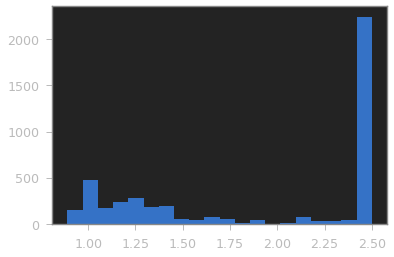

In [5]:
print(np.max(df_rt.iloc[:,1:].values))
plt.hist(df_rt.iloc[:,1:].values.ravel(),bins=20)

In [6]:
# cities_2_analyze = ['GUARULHOS', 'OSASCO', 'SANTO ANDRÉ', 
#                     'SÃO BERNARDO DO CAMPO', 'SÃO PAULO']

# city_name = ['GUARULHOS', 'OSASCO', 'SANTO ANDRÉ', 
#                     'SÃO BERNARDO', 'SÃO PAULO']

# cities_2_analyze = ['ARAÇATUBA','RIBEIRÃO PRETO','SÃO JOSÉ DO RIO PRETO',
#                    'CAMPINAS','SÃO PAULO']

# city_name = ['ARAÇATUBA','RIBEIRÃO PRETO','RIO PRETO',
#                    'CAMPINAS','SÃO PAULO']

cities_2_analyze = ['ARAÇATUBA','RIBEIRÃO PRETO','SÃO JOSÉ DO RIO PRETO',
                    'SOROCABA', 'CAMPINAS', 'SÃO JOSÉ DOS CAMPOS', 'OSASCO', 
                    'SANTO ANDRÉ', 'GUARULHOS', 'SÃO BERNARDO DO CAMPO',
                    'SÃO PAULO']

city_name = ['ARAÇATUBA', 'RIBEIRÃO PRETO', 'RIO PRETO', 
             'SOROCABA', 'CAMPINAS', 'SÃO JOSÉ', 'OSASCO',
              'SANTO ANDRÉ', 'GUARULHOS', 'SÃO BERNARDO', 
             'SÃO PAULO']

# cities_2_analyze = ['SÃO JOSÉ DO RIO PRETO',
#                     'OSASCO', 
#                     'SÃO PAULO']

# city_name = ['RIO PRETO', 
#              'OSASCO', 
#              'SÃO PAULO']

bins = [0.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5]
color = ['orangered','darkorange','gold','blue','green','aliceblue']
#level = ['Severe','High','Elevated','Guarded','Low','Open']
level = ['Severo','Alto','Elevado','Moderado','Baixo','Sem Restrição']

# color = ['orangered','darkorange','gold','khaki','aquamarine','aliceblue']
# level = ['Lockdown','Stay Home','Bars+Sch.','Sch.+Gath.','Gathering','Open']

def get_level(v):
    for i in range(1,len(bins)):
        if v > bins[i-1] and v <= bins[i]:
            return((color[i-1],level[i-1],bins[i]))

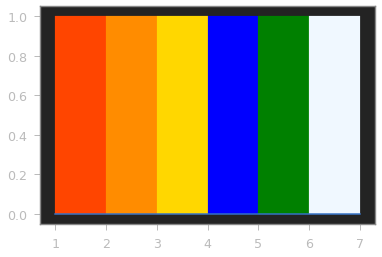

In [7]:
f,ax=plt.subplots()
for i in range(1,len(bins)):
    t = get_level(bins[i])
    rect = Rectangle((i, 0), 1, 1, color=t[0])
    ax.add_patch(rect)
ax.plot([1,len(bins)],[0,0])


In [8]:
valuesi = df_i[df_i['City']=='SÃO PAULO'].iloc[:,1:].values.ravel()
vmax = np.max(valuesi)
vmin = np.min(valuesi)

def plot_cities(ax,dfrt,dfi,c2a,cname):
    xm = dfrt.shape[1]-1
    for i,c in enumerate(c2a):
        #cname = ' '.join(c2a[i].split()[-2:])
        ax.plot([0,xm],[i,i],c='lightgray')
        ax.text(-60,i+0.5,cname[i])
        
        valuesrt = dfrt[dfrt['City']==c].iloc[:,1:].values.ravel()
        valuesi = dfi[dfi['City']==c].iloc[:,1:].values.ravel()
#         vmax = np.max(valuesi)
#         vmin = np.min(valuesi)
        ax.plot(np.arange(valuesi.size),i+(valuesi-vmin)/(vmax-vmin),c='k')
        for j in range(valuesrt.size):
            t = get_level(valuesrt[j])
            rect = Rectangle((j, i), 1, 1, color=t[0])
            ax.add_patch(rect)
    
    ax.plot([0,xm],[len(c2a),len(c2a)],c='lightgray')

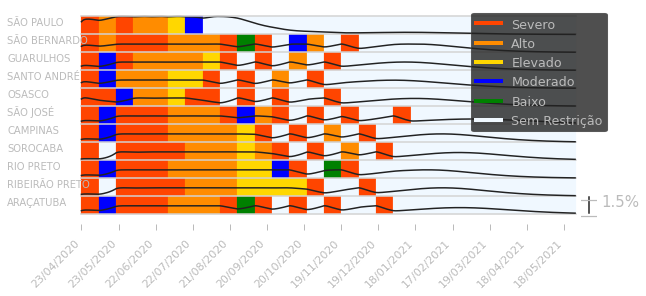

In [9]:
f,ax=plt.subplots(figsize=(10,4))
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
plot_cities(ax,df_rt,df_i,cities_2_analyze,city_name)

locs=ax.get_xticks()
ndays = df_rt.shape[1]-1
sim_dates = pd.date_range(start='2020-04-23', periods=ndays)
dates = sim_dates.format(formatter=lambda x: x.strftime('%d/%m/%Y'))
dates2plot = [dates[i] for i in range(0,ndays,30)]
#dates2plot.insert(0,'')
ax.set_xticks(np.arange(0,ndays,30))
ax.set_xticklabels(dates2plot, rotation=45, fontsize=11, ha='right')

legend_elements = [Line2D([0], [0], color=color[i], lw=4, label=level[i]) for i in range(len(color))]
ax.legend(handles=legend_elements, loc='upper right')
#ax.legend(handles=legend_elements, loc=(0.8,0.7))


####################
# xdata = (250,250)
# ydata = (2.1,2.9)
# line = ax.add_line(matplotlib.lines.Line2D(xdata, ydata,color='black'))
# anno_args = {
#     'ha': 'center',
#     'va': 'center',
#     'size': 24,
#     'rotation': 90,
#     'color': 'black'
# }
# eps = 0.05
# ax.annotate('[', xy=(xdata[0], ydata[0]+eps), **anno_args)
# ax.annotate(']', xy=(xdata[1], ydata[1]+eps), **anno_args)

xdata = (410,410)
ydata = (0.05,0.95)
ax.plot(xdata,ydata,c='k')
ax.text(xdata[0]-7,ydata[0]+0.03,'|',rotation=90,fontsize=15,weight='normal');
ax.text(xdata[0]-7,ydata[1]+0.06,'|',rotation=90,fontsize=15,weight='normal');
ax.text(xdata[0]+10,ydata[0]+0.4,'1.5%',fontsize=15,weight='normal');

In [10]:
f.savefig('sp_rp_osa_ctrl.png',format='png',bbox_inches = "tight")

In [12]:
df = pd.read_csv('mantendo_estado_atual_com_mobilidade.csv')
#df = pd.read_csv('../Data/resultados30-04/12x_mais_sp_estado_atual_com_mobilidade.csv')

df_crt = df[df['Variable']=='rt']
df_crt = df_crt.drop('Variable',axis=1)

df_ci = df[df['Variable']=='i']
df_ci = df_ci.drop('Variable',axis=1)

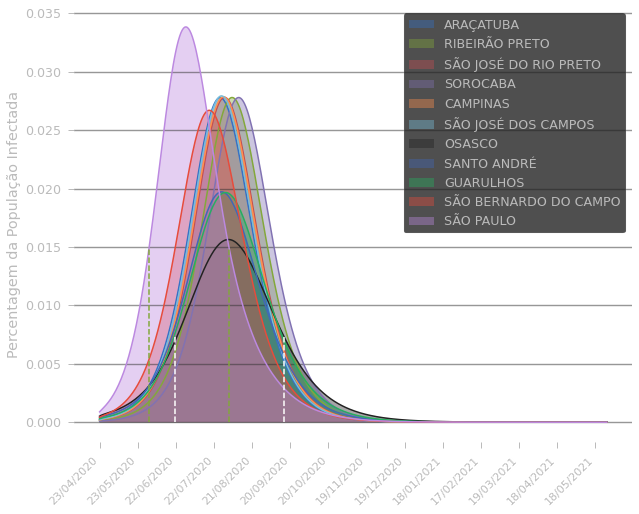

In [13]:
##### plot com area ####
f,ax=plt.subplots(figsize=(10,8))
#ax.axes.get_yaxis().set_visible(False)
#ax.set_ylabel('Percentage of Infected')
ax.set_ylabel('Percentagem da População Infectada')
ax.set_frame_on(False)

xm = df_ci.shape[1]-1
for i,c in enumerate(cities_2_analyze):#cities_2_analyze,city_name
#     ax.plot([0,xm],[i,i],c='k')
#     ax.text(-60,i+0.5,city_name[i])
    infect = df_ci[df_ci['City'] == c].iloc[:,1:].values.ravel()
#     vmax = np.max(infect)
#     vmin = np.min(infect)
    #ax.fill_between(np.arange(infect.size),i+(infect-vmin)/(vmax-vmin),color='skyblue')
    ax.fill_between(np.arange(infect.size),infect,alpha=0.4,label=c)
    ax.plot(np.arange(infect.size),infect)
ax.legend()

ndays = df_ci.shape[1]-1
sim_dates = pd.date_range(start='2020-04-23', periods=ndays)
dates = sim_dates.format(formatter=lambda x: x.strftime('%d/%m/%Y'))
dates2plot = [dates[i] for i in range(0,ndays,30)]

ax.grid(axis='y',alpha=0.5)
ax.set_xticks(np.arange(0,ndays,30));
ax.set_xticklabels(dates2plot, rotation=45, fontsize=11, ha='right');

ax.plot([39,39],[0,0.015],c='g',linestyle='--')
ax.plot([102,102],[0,0.015],c='g',linestyle='--')
ax.plot([59,59],[0,0.0075],c='w',linestyle='--')
ax.plot([145,145],[0,0.0075],c='w',linestyle='--')

locs=ax.get_yticks()

In [72]:
f.savefig('sp_rp_osa.png',format='png')

In [ ]:
dfcc = pd.read_csv('../Data/resultados30-04/mantendo_estado_atual_com_mobilidade.csv')
#dfcc = pd.read_csv('../Data/resultados30-04/12x_mais_sp_estado_atual_com_mobilidade.csv')

dfcc_crt = dfcc[dfcc['Variable']=='rt']
dfcc_crt = dfcc_crt.drop('Variable',axis=1)

dfcc_ci = dfcc[dfcc['Variable']=='i']
dfcc_ci = dfcc_ci.drop('Variable',axis=1)

In [ ]:
fcc,axcc=plt.subplots(figsize=(10,8))
#ax.axes.get_yaxis().set_visible(False)
axcc.set_ylabel('Percentage of Infected')
axcc.set_frame_on(False)

xmcc = dfcc_ci.shape[1]-1
for i,c in enumerate(cities_2_analyze):#cities_2_analyze,city_name
#     ax.plot([0,xm],[i,i],c='k')
#     ax.text(-60,i+0.5,city_name[i])
    infect = dfcc_ci[df_ci['City'] == c].iloc[:,1:].values.ravel()
#     vmax = np.max(infect)
#     vmin = np.min(infect)
    #ax.fill_between(np.arange(infect.size),i+(infect-vmin)/(vmax-vmin),color='skyblue')
    axcc.fill_between(np.arange(infect.size),infect,alpha=0.4,label=c)
    axcc.plot(np.arange(infect.size),infect)

axcc.legend(loc=(0.68,0.92))

ndays = dfcc_ci.shape[1]-1
sim_dates = pd.date_range(start='2020-04-23', periods=ndays)
dates = sim_dates.format(formatter=lambda x: x.strftime('%d/%m/%Y'))
dates2plot = [dates[i] for i in range(0,ndays,30)]

locs[-1] = 0.046
axcc.set_yticks(locs[1:-1]);
locs[3] = 0.02
axcc.set_yticklabels(locs[1:]);

axcc.grid(axis='y',alpha=0.5)
axcc.set_xticks(np.arange(0,ndays,30));
axcc.set_xticklabels(dates2plot, rotation=45, fontsize=11, ha='right');

In [ ]:
fcc.savefig('current.png',format='png')

In [ ]:
saopaulo_curr = df_ci[df_ci['City'] == 'SÃO PAULO'].iloc[:,1:].values.ravel()
saopaulo_contr = df_i[df_ci['City'] == 'SÃO PAULO'].iloc[:,1:].values.ravel()

In [ ]:
f,ax=plt.subplots(figsize=(10,8))
#ax.axes.get_yaxis().set_visible(False)
ax.set_ylabel('Percentage of Infected')
ax.set_frame_on(False)

ax.fill_between(np.arange(saopaulo_curr.size),saopaulo_curr,alpha=0.5,label='No control')
ax.fill_between(np.arange(saopaulo_contr.size),saopaulo_contr,alpha=0.5,label='Control')
ax.plot(np.arange(saopaulo_curr.size),saopaulo_curr)
ax.plot(np.arange(saopaulo_contr.size),saopaulo_contr,color='k')


ax.legend()
ax.grid(axis='y',alpha=0.5)
ax.set_xticks(np.arange(0,ndays,30));
ax.set_xticklabels(dates2plot, rotation=45, fontsize=11, ha='right');


In [ ]:
f.savefig('saopaulo_currentXcontrol.png',format='png')

In [ ]:
f,ax=plt.subplots(figsize=(10,8))
#ax.axes.get_yaxis().set_visible(False)
ax.set_ylabel('Percentage of Infected')
ax.set_frame_on(False)



valuesrt = df_rt[df_rt['City']=='SÃO PAULO'].iloc[:,1:].values.ravel()
for j in range(valuesrt.size):
    t = get_level(valuesrt[j])
    rect = Rectangle((j, 0), 1, 0.0156, color=t[0],alpha=1.0)
    ax.add_patch(rect)
    
#ax.fill_between(np.arange(saopaulo_curr.size),saopaulo_curr,alpha=0.5,label='No control')
#ax.fill_between(np.arange(saopaulo_contr.size),saopaulo_contr,alpha=0.5,label='Control')
ax.plot(np.arange(saopaulo_curr.size),saopaulo_curr,alpha=0.15)
ax.plot(np.arange(saopaulo_contr.size),saopaulo_contr,color='k')
    
bbox=dict(boxstyle='round',fc='seashell',ec='seashell')
ax.text(17,0.0056,level[1],rotation=90,fontsize=13,bbox=bbox)
ax.text(40,0.005,level[0],rotation=90,fontsize=13,bbox=bbox)
ax.text(65,0.0056,level[1],rotation=90,fontsize=13,bbox=bbox)
ax.text(95,0.005,level[3],rotation=90,fontsize=13,bbox=bbox)
ax.text(125,0.0056,level[-1],rotation=90,fontsize=13,bbox=bbox)

#ax.legend()
ax.grid(axis='y',alpha=0.5)
ax.set_xticks(np.arange(0,ndays,30));
ax.set_xticklabels(dates2plot, rotation=45, fontsize=11, ha='right');

In [ ]:
f.savefig('saopaulo_distancing.png',format='png')